In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from Networkmodel import NetworkModel_org, HopField

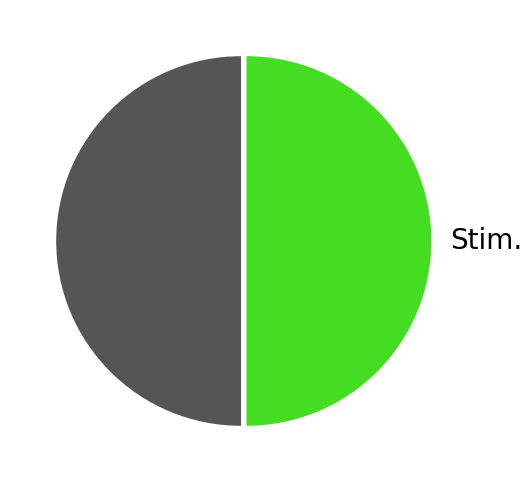

In [2]:
x = [600,600]
label = ["Stim.", ""]
colors = ["#44dd22","#555555"]
plt.figure(figsize = (6,6))
plt.pie(x, labels=label, counterclock=False, startangle=90,
        explode=[0.03, 0], colors=colors,textprops={'fontsize': 20})
plt.savefig("./figure/pie_ASD.png", bbox_inches = "tight")

In [3]:
class NetworkModel(NetworkModel_org):
    def task_condition(self):
        self.condition = np.array([1,2,3,4,5,6]) 
        self.actdict = {1: [2], 2: [4,5], 3: [4], 4: [1], 5: [1], 6: [2]}
        self.initial = 1
        self.terminal = [4,5]
        self.prob = 0.5
        self.stmdict = {1: [1], 2: [2.1,2.2], 3: [3], 4:[4], 5:[5], 6: [6]}
        self.cortex_calc = [1,6]
        self.stmindex = {1:0, 2:int(np.random.rand() < self.prob), 3:0, 4:0, 5:0, 6:0}
        self.swblock = 30
        self.NGtagthresh = 10
        self.HFregister = dict()
        self.condact = {i:[] for i in self.condition}
        for key,val in self.stmdict.items():
            for s in val:
                num = self.nstm #if s != 2.1 else 600
                tmp = np.zeros(num)
                tmp[np.sort(np.random.choice(len(tmp), int(len(tmp)/2), replace = False))] = 1  
                self.HFregister[s] = tmp

    def check_rwd(self, result, count):
        if not result[-1]["cond"] in self.terminal:
            return 0
        swmode = np.mod(np.floor(count/self.swblock),2)
        tmp1 = sum([result[i]["infcond"] for i in range(len(result))], [])
        tmp2 = [result[i]["cond"] for i in range(len(result))]
        initial = 1 if np.mod(np.floor((count+1)/self.swblock),2) == 0 else 6
        if initial != self.initial:
            self.actdict = {1: [2], 2: [4,5], 3: [4], 4: [initial], 5: [initial], 6: [2]}
            self.initial = None
        if self.stmindex[2] == 0:
            self.stmindex[2] = 0 if np.random.rand() < self.prob else 1
            return int(4 in tmp2) if swmode == 0 else int(5 in tmp2)
        else:
            self.stmindex[2] = 0 if np.random.rand() < self.prob else 1
            return int(5 in tmp2) if swmode == 0 else int(4 in tmp2)


In [4]:
allresult = dict()
x = 0

In [5]:
hp = NetworkModel(600,600,300,1000,8)
result = []
HCprev = []
cond = None
for i in range(120):
    result_,HCprev,cond = hp.process(i, HCprev, cond, verbose = True)
    result.append(result_)
allresult[x] = result
x += 1

trial 0 stmindex 0 HCprev []
HCprev []
0-0 [32]
plan 1 [] 2
init 1 2
memo 1 0
HF2HC [265] 1-0
HC2HF [265] 1-0
pkup [265] 1-0
choose [1. 2.] [265 252]
stmremap [-1] [252] []
HCprev [[252]]
0-0 [248]
plan 2 [] 5
init 2 5
memo 2 0
HF2HC [242] 2.1-0
HC2HF [242] 2.1-0
pkup [242] 2.1-0
HC2HF [252] [2.1 0. ]
remove [1.  2.1 5. ] [265 252 242  28]
HF2HC [242] 2.1-0
HC2HF [242] 2.1-0
HCprev [array([28], dtype=int64)]
0-0 [99]
plan 5 [] 1
init 5 1
memo 5 0
HF2HC [143] 5-0
HC2HF [143] 5-0
pkup [143] 5-0
choose [5. 1.] [143 293]
HC2HF [28] 5-0
HF2HC [143] 5-0
HC2HF [143] 5-0
check trans [5.0] {}
['c:1', 'n:5.0', 'e:0.0', 'i:[1.0, 2.1]', 'p:[1.0, 2.0]', 'H:[265 252 242  28]', 'a:1-0', 'r:0']
['c:5', 'n:1', 'e:0.0', 'i:[5.0, 1.0]', 'p:[5.0, 1.0]', 'H:[ 28 143 293]', 'a:5-0', 'r:0', "p:['1-0', '2.1-0', '5-0']"]

trial 1 stmindex 1 HCprev 293
HCprev [array([293], dtype=int64)]
1-0 [265]
1-0 [265]
1-0 [265]
1-0 [265]
1-0 [265]
1-0 [265]
1-0 [265]
1-0 [265]
1-0 [265]
choose [1.  2.1 5. ] [265 252 242  2

choose [1.  2.1 4. ] [265 252 242 218   3 274]
stmremap [242] [252] [242 286]
HCprev [[286]]
2.2-1 [286]
HC2HF [286] [2.2 1. ]
remove [1.  2.2 4. ] [265 252 286  54]
HF2HC [286] 2.2-1
HC2HF [286] 2.2-1
HCprev [array([265], dtype=int64), array([252], dtype=int64), array([286], dtype=int64), array([54], dtype=int64)]
4-0 [67]
choose [4. 1.] [ 67 275]
HC2HF [54] 4-0
HF2HC [67] 4-0
HC2HF [67] 4-0
check trans [1.0, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.5562946875', 'i:[1.0, 2.2, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[ 89 265 252 286  54]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.0', 'i:[4.0, 1.0]', 'p:[4.0, 1.0]', 'H:[265 252 286  54  67 275]', 'a:4-0', 'r:0', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0', '4-1', '2.2-2', '5-1']"]

trial 13 stmindex 1 HCprev 275
HCprev [array([275], dtype=int64)]
1-0 [265]
choose [1.  2.1 4. ] [265 252 242 218   3 274]
stmremap [242] [252] [242 286]
HCprev [[286]]
2.2-1 [286]
HC2HF [286] [2.2 1. ]
remove [1.  2.2] [265 252 286 151]
HF2HC [286] 2.2-1
HC2HF [286] 2.2-1
HC

check trans [1.0, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.15', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[274 265 252 242 218   3 274]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.15', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[274 265 252 242 218   3 274]', 'a:4-1', 'r:1', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0', '4-1', '2.2-2', '5-1']"]

trial 25 stmindex 0 HCprev 274
HCprev [array([274], dtype=int64)]
1-0 [265]
choose [1.  2.1 4. ] [265 252 242 218   3 274]
HC2HF [274] 1-0
HF2HC [265] 1-0
HC2HF [265] 1-0
check trans [1.0, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.27749999999999997', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[274 265 252 242 218   3 274]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.27749999999999997', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.1, 4.0]', 'H:[274 265 252 242 218   3 274]', 'a:4-1', 'r:1', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0', '4-1', '2.2-2', '5-1']"]

trial 26 stmindex 1 HCprev 274
HCprev [array([274], dtype=int64)]
1-0 [265]
choose [1.  2.1 4. ] [265 252 242 218

HC2HF [80] [2.2 1. ]
remove [6.  2.2] [185 196 286 151]
HF2HC [286] 2.2-1
HC2HF [286] 2.2-1
HCprev [array([185], dtype=int64), array([196], dtype=int64), array([286], dtype=int64), array([151], dtype=int64)]
2.2-1 [286]
choose [2.2 4. ] [286  54]
HC2HF [151] 2.2-1
HF2HC [286] 2.2-1
HC2HF [286] 2.2-1
HCprev [array([286], dtype=int64), array([54], dtype=int64)]
4-0 [67]
choose [4. 1.] [ 67 275]
HC2HF [54] 4-0
HF2HC [67] 4-0
HC2HF [67] 4-0
check trans [1.0, 4.0, 1.0] {(4.0, 1.0): 1.0}
['c:6', 'n:2.2', 'e:0.15', 'i:[6.0, 2.2]', 'p:[6.0, 2.1, 5.0]', 'H:[170 185 196 286 151]', 'a:6-0', 'r:0']
['c:2', 'n:4.0', 'e:0.0', 'i:[2.2, 4.0]', 'p:[2.2, 4.0]', 'H:[185 196 286  54]', 'a:2.2-1', 'r:0']
['c:4', 'n:1', 'e:0.0', 'i:[4.0, 1.0]', 'p:[4.0, 1.0]', 'H:[286  54  67 275]', 'a:4-0', 'r:1', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0', '4-1', '2.2-2', '5-1', '6-0', '2.1-3', '4-2', '2.2-4', '4-3', '6-1', '2.2-5', '5-2', '5-3']"]

trial 37 stmindex 1 HCprev [ 67 275]
HCprev [array([67], dtype=int64), arr

6-0 [185]
6-0 [185]
6-0 [185]
6-0 [185]
6-0 [185]
choose [6.  2.1] [185 196]
HC2HF [146] 6-0
HF2HC [185] 6-0
HC2HF [185] 6-0
HCprev [array([185], dtype=int64), array([196], dtype=int64)]
2.1-0 [242]
choose [2.1 4. ] [242 218   3 274]
HC2HF [196] 2.1-0
HF2HC [242] 2.1-0
HC2HF [242] 2.1-0
set NG [4. 1.] {(4.0, 1.0): 2.533}
check trans [1.0, 6.0, 2.1, 4.0, 1.0] {(4.0, 1.0): 2.533}
['c:6', 'n:2.1', 'e:0.0', 'i:[6.0, 2.1]', 'p:[6.0, 2.1]', 'H:[146 185 196]', 'a:6-0', 'r:0']
['c:2', 'n:4.0', 'e:0.108375', 'i:[2.1, 4.0]', 'p:[2.1, 4.0]', 'H:[185 196 242 218   3 274]', 'a:2.1-0', 'r:0']
['c:4', 'n:6', 'e:0.108375', 'i:[2.1, 4.0]', 'p:[2.1, 4.0]', 'H:[185 196 242 218   3 274]', 'a:4-0', 'r:0', "p:['1-0', '2.1-0', '5-0', '4-0', '4-1', '5-1', '6-0', '4-2', '4-3', '6-1', '5-2', '5-3', '6-2', '4-4', '6-3', '4-5', '6-4', '2.1-8', '4-6', '6-5', '2.1-9', '5-4']"]

trial 46 stmindex 1 HCprev 274
HCprev [array([274], dtype=int64)]
0-0 [24]
plan 6 [] 2
init 6 2
memo 6 6
HF2HC [197] 6-6
HC2HF [197] 6-6
pk

6-0 [185]
6-0 [185]
6-0 [185]
6-0 [185]
6-0 [185]
6-0 [185]
6-0 [185]
6-0 [185]
choose [6.  2.1] [185 196]
HC2HF [101] 6-0
HF2HC [185] 6-0
HC2HF [185] 6-0
HCprev [array([185], dtype=int64), array([196], dtype=int64)]
2.1-0 [242]
choose [2.1 4. ] [242 218   3 274]
HC2HF [196] 2.1-0
HF2HC [242] 2.1-0
HC2HF [242] 2.1-0
set NG [4. 1.] {(4.0, 1.0): 3.1411732999999997}
check trans [1.0, 6.0, 2.1, 4.0, 1.0] {(4.0, 1.0): 3.1411732999999997}
['c:6', 'n:2.1', 'e:0.0', 'i:[6.0, 2.1]', 'p:[6.0, 2.1]', 'H:[101 185 196]', 'a:6-0', 'r:0']
['c:2', 'n:4.0', 'e:0.05657242734375', 'i:[2.1, 4.0]', 'p:[2.1, 4.0]', 'H:[185 196 242 218   3 274]', 'a:2.1-0', 'r:0']
['c:4', 'n:6', 'e:0.05657242734375', 'i:[2.1, 4.0]', 'p:[2.1, 4.0]', 'H:[185 196 242 218   3 274]', 'a:4-0', 'r:0', "p:['1-0', '2.1-0', '5-0', '4-0', '4-1', '5-1', '6-0', '4-2', '4-3', '5-2', '5-3', '4-4', '4-5', '2.1-8', '4-6', '2.1-9', '5-4', '2.2-10', '5-5', '2.1-11', '4-7', '6-8', '2.2-12', '5-6', '6-9', '2.2-13', '5-7']"]

trial 54 stmindex 0 

1-0 [265]
choose [1.  2.2 5. ] [265 252 226 217 143 293]
HC2HF [293] 1-0
HF2HC [265] 1-0
HC2HF [265] 1-0
check trans [1.0, 2.2, 5.0, 1.0] {(4.0, 1.0): 1.5391749169999995}
['c:1', 'n:5.0', 'e:0.47799375', 'i:[1.0, 2.2, 5.0]', 'p:[1.0, 2.2, 5.0]', 'H:[293 265 252 226 217 143 293]', 'a:1-0', 'r:0']
['c:5', 'n:1', 'e:0.47799375', 'i:[1.0, 2.2, 5.0]', 'p:[1.0, 2.2, 5.0]', 'H:[293 265 252 226 217 143 293]', 'a:5-0', 'r:1', "p:['1-0', '2.1-0', '5-0', '4-0', '5-1', '6-0', '5-2', '5-3', '2.1-8', '2.1-9', '5-4', '2.2-10', '5-5', '2.1-11', '6-8', '2.2-12', '5-6', '6-9', '2.2-13', '5-7', '6-10', '2.1-14', '4-8']"]

trial 64 stmindex 0 HCprev 293
HCprev [array([293], dtype=int64)]
1-0 [265]
choose [1.  2.2 5. ] [265 252 226 217 143 293]
stmremap [226] [252] [226 242]
HCprev [[242]]
2.1-0 [242]
HC2HF [242] [2.1 0. ]
remove [1.  2.1 5. ] [265 252 242  28 143 293]
HF2HC [242] 2.1-0
HC2HF [242] 2.1-0
set NG [5. 0.] {(5.0, 0.0): 1.0, (4.0, 1.0): 1.0774224418999996}
check trans [1.0, 2.2, 2.1, 5.0, 1.0] 

HF2HC [242] 2.1-0
HC2HF [242] 2.1-0
set NG [5. 0.] {(5.0, 0.0): 1.7, (4.0, 1.0): 0.1810823898101329}
check trans [1.0, 2.2, 2.1, 5.0, 1.0] {(5.0, 0.0): 1.7, (4.0, 1.0): 0.1810823898101329}
['c:1', 'n:5.0', 'e:0.562236964515044', 'i:[1.0, 2.1, 5.0]', 'p:[1.0, 2.2, 5.0]', 'H:[293 265 252 242  28 143 293]', 'a:1-0', 'r:0']
['c:5', 'n:1', 'e:0.562236964515044', 'i:[1.0, 2.1, 5.0]', 'p:[1.0, 2.2, 5.0]', 'H:[293 265 252 242  28 143 293]', 'a:5-0', 'r:0', "p:['1-0', '2.1-0', '5-0', '4-0', '5-1', '6-0', '5-2', '5-3', '2.1-8', '2.1-9', '5-4', '2.2-10', '5-5', '2.1-11', '6-8', '2.2-12', '5-6', '6-9', '2.2-13', '5-7', '6-10', '2.1-14', '4-8']"]

trial 77 stmindex 1 HCprev 293
HCprev [array([293], dtype=int64)]
1-0 [265]
choose [1.  2.2 5. ] [265 252 226 217 143 293]
HC2HF [293] 1-0
HF2HC [265] 1-0
HC2HF [265] 1-0
check trans [1.0, 2.2, 5.0, 1.0] {(4.0, 1.0): 0.1810823898101329}
['c:1', 'n:5.0', 'e:0.47790141983778744', 'i:[1.0, 2.2, 5.0]', 'p:[1.0, 2.2, 5.0]', 'H:[293 265 252 226 217 143 293]', '

choose [1.  2.2 5. ] [265 252 226 217 143 293]
HC2HF [293] 1-0
HF2HC [265] 1-0
HC2HF [265] 1-0
check trans [1.0, 2.2, 5.0, 1.0] {(4.0, 1.0): 0.030434517255389027}
initial is none 6 1 5
['c:1', 'n:5.0', 'e:0.5224869878747583', 'i:[1.0, 2.2, 5.0]', 'p:[1.0, 2.2, 5.0]', 'H:[293 265 252 226 217 143 293]', 'a:1-0', 'r:0']
['c:5', 'n:1', 'e:0.5224869878747583', 'i:[1.0, 2.2, 5.0]', 'p:[1.0, 2.2, 5.0]', 'H:[293 265 252 226 217 143 293]', 'a:5-0', 'r:1', "p:['1-0', '2.1-0', '5-0', '4-0', '5-1', '6-0', '5-2', '5-3', '2.1-8', '2.1-9', '5-4', '2.2-10', '5-5', '2.1-11', '6-8', '2.2-12', '5-6', '6-9', '2.2-13', '5-7', '6-10', '2.1-14', '4-8']"]

trial 90 stmindex 0 HCprev []
HCprev []
6-0 [185]
6-0 [185]
6-0 [185]
6-0 [185]
6-0 [185]
6-0 [185]
6-0 [185]
6-0 [185]
6-0 [185]
choose [6.  2.1] [185 196]
HF2HC [185] 6-0
HC2HF [185] 6-0
HCprev [array([185], dtype=int64), array([196], dtype=int64)]
2.1-0 [242]
choose [2.1 5. ] [242  28 143 293]
HC2HF [196] 2.1-0
HF2HC [242] 2.1-0
HC2HF [242] 2.1-0
check t

plan 2 [5] 4
actremapping [  4 267] [  4 179]
HC2HF [4] [ 2.2 16. ]
remove [6.  2.2 4. ] [185 196   4 179]
HF2HC [4] 2.2-16
HC2HF [4] 2.2-16
HCprev [array([179], dtype=int64)]
0-0 [178]
plan 4 [] 6
init 4 6
memo 4 11
HF2HC [41] 4-11
HC2HF [41] 4-11
pkup [41] 4-11
choose [4. 6.] [ 41 253]
HC2HF [179] 4-11
HF2HC [41] 4-11
HC2HF [41] 4-11
check trans [4.0] {(1.0, -1.0): 1.0, (4.0, 1.0): 0.021304162078772317}
['c:6', 'n:4.0', 'e:0.6924061987723303', 'i:[6.0, 2.2]', 'p:[6.0, 2.1, 5.0]', 'H:[277 185 196   4 179]', 'a:6-0', 'r:0']
['c:4', 'n:6', 'e:0.0', 'i:[4.0, 6.0]', 'p:[4.0, 6.0]', 'H:[179  41 253]', 'a:4-11', 'r:1', "p:['1-0', '2.1-0', '5-0', '4-0', '6-0', '6-8', '6-9', '6-10', '4-8', '6-11', '2.1-15', '4-9', '2.2-16', '5-8', '6-12', '2.1-17', '5-9', '6-13', '2.1-18', '5-10', '6-14', '2.1-19', '4-10', '4-11']"]

trial 101 stmindex 0 HCprev 253
HCprev [array([253], dtype=int64)]
6-0 [185]
6-0 [185]
choose [6.  2.1 5. ] [185 196 242  28 143 293]
HC2HF [253] 6-0
HF2HC [185] 6-0
HC2HF [185] 

choose [6.  2.1 5. ] [185 196 242  28 143 293]
stmremap [242] [196] [ 11 242]
HCprev [[11]]
2.2-23 [11]
plan 2 [5] 4
actremapping [ 11 168] [11 27]
HC2HF [11] [ 2.2 23. ]
remove [6.  2.2 4. ] [185 196  11  27]
HF2HC [11] 2.2-23
HC2HF [11] 2.2-23
HCprev [array([27], dtype=int64)]
0-0 [246]
plan 4 [] 6
init 4 6
memo 4 12
HF2HC [188] 4-12
HC2HF [188] 4-12
pkup [188] 4-12
choose [4. 6.] [188 299]
HC2HF [27] 4-12
HF2HC [188] 4-12
HC2HF [188] 4-12
check trans [4.0] {(1.0, -1.0): 1.0, (4.0, 1.0): 0.021304162078772317}
['c:6', 'n:4.0', 'e:0.8110989568210574', 'i:[6.0, 2.2]', 'p:[6.0, 2.1, 5.0]', 'H:[215 185 196  11  27]', 'a:6-0', 'r:0']
['c:4', 'n:6', 'e:0.0', 'i:[4.0, 6.0]', 'p:[4.0, 6.0]', 'H:[ 27 188 299]', 'a:4-12', 'r:1', "p:['1-0', '2.1-0', '5-0', '4-0', '6-0', '4-8', '4-9', '5-8', '5-9', '5-10', '4-10', '4-11', '6-15', '5-11', '6-16', '5-12', '6-17', '2.1-22', '5-13', '2.2-23', '5-14', '4-12']"]

trial 110 stmindex 1 HCprev 299
HCprev [array([299], dtype=int64)]
6-0 [185]
6-0 [185]
cho

In [6]:
num = 40
trialnum = 120
allresult = dict() #np.zeros((num,trialnum))*np.nan
x = 0
errcounter = 0
odds = dict()
while x < num:
    print(x)
    hp = NetworkModel(500,700,300,1000,8)
    result = []
    HCprev = []
    cond = None
    try:
        for i in range(trialnum):
            result_,HCprev,cond = hp.process(i, HCprev, cond,verbose = False)
            result.append(result_)
        allresult[x] = result
        odds[x] = hp.oddcounter
    except:
        print("error",x)
        allresult[x] = result
        errcounter += 1
    #if result[-1][-1]["rwd"] == 0:
    #    break
    x += 1
print(errcounter)
oddcounter = {k2: {k:v for k,v in odds[k2].items()} for k2 in odds.keys()}

0
init 1 2
init 2 5
init 5 1
actremapping [122 232 274 174] [122 232 274  34]
init 4 1
init 2 5
init 5 1
init 6 2
init 2 5
init 5 6
init 2 4
init 4 6
actremapping [152  64] [152 134]
init 5 6
set NG [5. 1.] {(5.0, 1.0): 1.0}
init 6 2
init 2 4
init 4 6
actremapping [127 171 277 194] [127 171 277 261]
init 4 6
init 6 2
init 2 5
init 5 6
init 6 2
init 2 5
init 5 6
set NG [4. 0.] {(4.0, 0.0): 1.0, (5.0, 1.0): 0.7}
init 6 2
init 2 4
init 4 6
set NG [4. 0.] {(4.0, 0.0): 1.7, (5.0, 1.0): 0.48999999999999994}
init 6 2
forget 2.1-4 [273] [249]
forget 2.2-2 [277] [171]
forget 2.1-3 [152] [171]
forget 2.2-5 [235] [95]
forget 2.2-6 [66] [125]
forget 2.2-7 [220] [105]
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
set NG [4. 0.] {(4.0, 0.0): 1.0, (5.0, 1.0): 0.3429999999999999}
init 6 2
init 2 4
init 4 6
set NG [5. 1.] {(4.0, 0.0): 0.7, (5.0, 1.0): 1.2401}
forget 6-1 [113] []
forget 6-7 [74] []
forget 6-4 [60] []
forget 6-5 [81] []
forget 6-6 [284] []
forget 6-2 [291] []
forget 6-3 [299] [18]
init 6 

forget 4-10 [42] []
forget 4-13 [58] [257]
forget 4-8 [34] [218]
forget 4-9 [144] [145]
forget 4-14 [64] [115]
init 4 6
set NG [4. 0.] {(4.0, 0.0): 2.2447191942009996, (5.0, 0.0): 1.0563178023299997}
init 6 2
init 2 5
init 5 6
set NG [5. 0.] {(4.0, 0.0): 1.5713034359406997, (5.0, 0.0): 1.739422461631}
init 6 2
init 2 4
init 4 6
set NG [5. 0.] {(4.0, 0.0): 1.0999124051584896, (5.0, 0.0): 2.2175957231416996}
init 6 2
init 2 5
forget 5-8 [20] []
forget 5-12 [28] []
forget 5-13 [131] []
forget 5-10 [89] []
forget 5-9 [190] [50]
forget 5-14 [122] []
forget 5-11 [245] []
init 5 6
3
init 1 2
init 2 5
init 5 1
init 2 4
init 4 1
actremapping [ 98 257 149 278] [ 98 257 149 169]
init 2 4
init 4 1
actremapping [129  55] [129 203]
init 5 1
actremapping [ 98 257  91 180] [ 98 257  91  63]
init 4 1
init 6 2
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
init 6 2
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
set NG [4. 0.] {(4.0, 0.0): 1.0}
init 6 2
init 2 4
init 4 6
set NG [4. 0.] {(4.0, 0.0): 1.7}
init

init 6 2
forget 2.2-19 [10] [87]
forget 2.1-15 [193] [233]
forget 2.2-17 [153] [42]
forget 2.1-14 [117] [284]
forget 2.2-16 [275] [208]
forget 2.1-18 [200] []
init 2 5
init 5 6
5
init 1 2
init 2 4
init 4 1
actremapping [164 280 222  79] [164 280 222 226]
init 5 1
init 2 4
init 4 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
6
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
actremapping [176  33 222 262] [176  33 222 233]
init 5 1
actremapping [247 256] [247 275]
init 4 1
init 6 2
init 2 4
init 4 6
actremapping [ 59 202 236 231] [ 59 202 236 210]
init 5 6
init 2 4
init 4 6
7
init 1 2
init 2 5
init 5 1
init 2 4
init 4 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
init 2 4
init 4 6
set NG [5. 0.] {(5.0, 0.0): 1.0}
init 6 2
init 2 5
init 5 6
set NG [5. 0.] {(5.0, 0.0): 1.7}
init 6 2
init 2 5
init 5 6
set NG [4. 0.] {(5.0, 0.0): 1.19, (4.0, 0.0): 1.0}
init 6 2
init 2 4
init 4 6
set NG [5. 0.] {(5.0, 0.0): 1.833, (4.0, 0.0): 0.7}
init 6 2
forget 2.2-5 [81] [0]
forget 2.1-3 [281] [181]
forget 

set NG [4. 0.] {(1.0, -1.0): 0.0005585458640832833, (5.0, 0.0): 1.6439688348999997, (4.0, 0.0): 1.5831}
init 6 2
init 2 5
forget 5-8 [148] [223]
forget 5-12 [130] [286]
forget 5-14 [68] [272]
forget 5-13 [8] []
forget 5-10 [41] [173]
forget 5-11 [49] [258]
forget 5-9 [202] []
init 5 6
set NG [5. 0.] {(1.0, -1.0): 0.00039098210485829826, (5.0, 0.0): 2.15077818443, (4.0, 0.0): 1.1081699999999999}
init 6 2
init 2 4
init 4 6
9
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
init 6 2
init 2 5
init 5 6
init 2 4
init 4 6
10
init 1 2
init 2 5
init 5 1
init 2 4
init 4 1
actremapping [ 72 256 184 126] [ 72 256 184 234]
actremapping [255  55] [255 248]
init 5 1
init 2 5
init 5 1
init 1 2
init 2 4
init 4 1
init 2 4
init 4 1
init 6 2
init 2 5
init 5 6
set NG [4. 0.] {(4.0, 0.0): 1.0}
init 6 2
init 2 5
init 5 6
actremapping [158 291  97 277] [158 291  97  69]
init 6 2
init 2 5
init 5 6
init 6 2
forget 2.2-7 [143] [138]
forget 2.2-5 [97] [291]
forget 2.1-4 [290] [104]
forget 2.2-6 [14] [252]
forget 2.2-

set NG [5. 5.] {(4.0, 0.0): 1.19, (4.0, 1.0): 0.7511699999999999, (5.0, 5.0): 1.0}
set NG [5. 5.] {(4.0, 0.0): 0.833, (4.0, 1.0): 0.5258189999999999, (5.0, 5.0): 1.7}
set NG [5. 5.] {(4.0, 0.0): 0.5831, (4.0, 1.0): 0.36807329999999994, (5.0, 5.0): 2.19}
set NG [4. 0.] {(4.0, 0.0): 1.40817, (4.0, 1.0): 0.25765130999999997, (5.0, 5.0): 1.533}
set NG [4. 0.] {(4.0, 0.0): 1.985719, (4.0, 1.0): 0.18035591699999998, (5.0, 5.0): 1.0731}
set NG [5. 5.] {(4.0, 0.0): 1.3900032999999998, (4.0, 1.0): 0.12624914189999997, (5.0, 5.0): 1.75117}
set NG [5. 5.] {(4.0, 0.0): 0.9730023099999998, (4.0, 1.0): 0.08837439932999998, (5.0, 5.0): 2.2258189999999995}
set NG [5. 5.] {(4.0, 0.0): 0.6811016169999998, (4.0, 1.0): 0.06186207953099998, (5.0, 5.0): 2.5580732999999993}
set NG [5. 5.] {(4.0, 0.0): 0.47677113189999987, (4.0, 1.0): 0.043303455671699985, (5.0, 5.0): 2.7906513099999994}
set NG [5. 5.] {(4.0, 0.0): 0.3337397923299999, (4.0, 1.0): 0.030312418970189988, (5.0, 5.0): 2.9534559169999994}
set NG [5

set NG [4. 0.] {(4.0, 0.0): 1.7, (4.0, 2.0): 6.571236236353417e-05, (5.0, 4.0): 0.09084724155487049}
init 6 2
init 2 4
forget 4-12 [126] []
forget 4-11 [113] []
forget 4-9 [20] []
forget 4-14 [46] [194]
forget 4-8 [75] [292]
forget 4-10 [59] []
forget 4-13 [101] []
init 4 6
set NG [4. 0.] {(4.0, 0.0): 2.19, (4.0, 2.0): 4.5998653654473914e-05, (5.0, 4.0): 0.06359306908840934}
init 6 2
init 2 4
init 4 6
set NG [4. 0.] {(4.0, 0.0): 2.533, (4.0, 2.0): 3.219905755813174e-05, (5.0, 4.0): 0.04451514836188653}
init 6 2
init 2 4
init 4 6
init 6 2
init 2 4
init 4 6
set NG [4. 0.] {(4.0, 0.0): 1.0, (4.0, 2.0): 2.2539340290692216e-05, (5.0, 4.0): 0.03116060385332057}
init 6 2
init 2 5
init 5 6
set NG [4. 0.] {(4.0, 0.0): 1.7, (4.0, 2.0): 1.577753820348455e-05, (5.0, 4.0): 0.021812422697324398}
forget 6-19 [11] []
forget 6-21 [81] []
forget 6-20 [75] []
forget 6-18 [17] []
forget 6-15 [14] []
forget 6-17 [108] []
forget 6-16 [57] []
init 6 2
forget 2.2-26 [231] [254]
forget 2.2-23 [5] [290]
forget 

set NG [5. 4.] {(4.0, 0.0): 0.0034661946584093805, (5.0, 4.0): 2.533}
init 1 2
init 2 4
init 4 1
set NG [5. 4.] {(4.0, 0.0): 0.002426336260886566, (5.0, 4.0): 2.7731}
init 1 2
init 2 5
init 5 1
set NG [5. 4.] {(4.0, 0.0): 0.001698435382620596, (5.0, 4.0): 2.9411699999999996}
init 1 2
forget 2.2-13 [199] [259]
forget 2.1-12 [35] [54]
forget 2.1-8 [25] [59]
forget 2.1-10 [277] [93]
forget 2.2-9 [241] [245]
forget 2.1-11 [55] [157]
init 2 5
forget 5-6 [0] []
forget 5-4 [233] [50]
forget 5-7 [212] [77]
forget 5-3 [19] []
forget 5-2 [85] [101]
forget 5-1 [262] [37]
forget 5-5 [72] [125]
init 5 1
init 1 2
init 2 4
forget 4-3 [232] [296]
forget 4-1 [42] []
forget 4-6 [45] [263]
forget 4-7 [291] [126]
forget 4-5 [48] [109]
forget 4-4 [133] []
forget 4-2 [58] []
init 4 1
init 1 2
init 2 4
init 4 1
forget 1-8 [103] []
forget 1-14 [282] []
forget 1-9 [68] []
forget 1-12 [175] []
forget 1-11 [18] []
forget 1-13 [279] []
forget 1-10 [222] []
init 1 2
init 2 4
init 4 1
init 1 2
init 2 4
init 4 1
ini

set NG [4. 1.] {(5.0, 1.0): 1.043, (4.0, 1.0): 1.49}
init 6 2
init 2 4
init 4 6
init 6 2
init 2 4
forget 4-4 [5] [228]
forget 4-3 [15] []
forget 4-6 [75] []
forget 4-5 [185] [83]
forget 4-1 [212] [256]
forget 4-2 [38] [296]
forget 4-7 [106] [235]
init 4 6
init 6 2
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
forget 6-9 [243] []
forget 6-12 [89] []
forget 6-14 [277] []
forget 6-10 [161] []
forget 6-8 [223] []
forget 6-11 [39] []
forget 6-13 [212] []
init 6 2
forget 2.2-13 [196] [135]
forget 2.2-17 [204] [293]
forget 2.1-16 [265] [31]
forget 2.2-14 [226] [43]
forget 2.1-15 [136] [297]
init 2 5
init 5 6
init 2 4
init 4 6
init 6 2
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
init 6 2
init 2 4
init 4 6
init 6 2
forget 2.2-18 [62] [65]
forget 2.2-21 [133] [197]
forget 2.1-19 [80] [65]
forget 2.1-22 [114] [61]
forget 2.1-20 [98] [124]
init 2 5
init 5 6
21
init 1 2
init 2 5
init 5 1
init 2 4
init 4 1
actremapping [ 27 272 175   0] [ 27 272 175 119]
init 5 1
actremapping [91 85] [91 22]
init 4 

set NG [4. 0.] {(4.0, 0.0): 1.0, (4.0, 1.0): 0.02766977006251221}
set NG [4. 0.] {(4.0, 0.0): 1.7, (4.0, 1.0): 0.019368839043758548}
set NG [4. 0.] {(4.0, 0.0): 2.19, (4.0, 1.0): 0.013558187330630982}
set NG [4. 0.] {(4.0, 0.0): 2.533, (4.0, 1.0): 0.009490731131441686}
set NG [4. 0.] {(4.0, 0.0): 1.0, (4.0, 1.0): 0.00664351179200918}
set NG [4. 0.] {(4.0, 0.0): 1.7, (4.0, 1.0): 0.004650458254406425}
set NG [4. 0.] {(4.0, 0.0): 2.19, (4.0, 1.0): 0.0032553207780844974}
set NG [4. 0.] {(4.0, 0.0): 1.0, (4.0, 1.0): 0.002278724544659148}
24
init 1 2
init 2 4
init 4 1
actremapping [ 24 263 216 211] [ 24 263 216  98]
init 2 4
init 4 1
init 2 4
init 4 1
init 1 2
init 2 5
init 5 1
init 1 2
init 2 4
init 4 1
init 6 2
init 2 5
init 5 6
actremapping [ 96  58 206 167] [ 96  58 206 137]
init 2 5
init 5 6
set NG [5. 0.] {(5.0, 0.0): 1.0}
set NG [4. 1.] {(4.0, 1.0): 1.0}
set NG [4. 1.] {(4.0, 1.0): 1.7}
set NG [4. 1.] {(4.0, 1.0): 2.19}
set NG [5. 0.] {(4.0, 1.0): 1.533, (5.0, 0.0): 1.0}
set NG [5. 0.

set NG [5. 0.] {(5.0, 0.0): 2.3374321866644077, (5.0, 1.0): 0.0002603242172433095, (4.0, 5.0): 0.9955882306576703}
set NG [5. 0.] {(5.0, 0.0): 1.0, (5.0, 1.0): 0.00018222695207031661, (4.0, 5.0): 0.6969117614603692}
init 6 2
init 2 4
init 4 6
set NG [5. 0.] {(5.0, 0.0): 1.0, (5.0, 1.0): 0.00012755886644922162, (4.0, 5.0): 0.48783823302225837}
init 6 2
init 2 5
init 5 6
set NG [5. 0.] {(5.0, 0.0): 1.7, (5.0, 1.0): 8.929120651445512e-05, (4.0, 5.0): 0.34148676311558085}
init 6 2
init 2 4
init 4 6
set NG [5. 0.] {(5.0, 0.0): 2.19, (5.0, 1.0): 6.250384456011858e-05, (4.0, 5.0): 0.23904073418090657}
forget 6-14 [2] []
forget 6-8 [205] [83]
forget 6-11 [152] []
forget 6-13 [87] []
forget 6-10 [217] []
forget 6-12 [201] []
forget 6-9 [74] []
init 6 2
init 2 5
init 5 6
init 6 2
forget 2.1-17 [59] [86]
forget 2.2-14 [222] [97]
forget 2.2-19 [239] []
forget 2.1-18 [65] [1]
forget 2.2-16 [48] []
forget 2.2-15 [155] [8]
init 2 4
forget 4-4 [73] [13]
forget 4-5 [31] [135]
forget 4-6 [0] [137]
forge

init 2 5
forget 5-4 [61] [292]
forget 5-2 [141] []
forget 5-1 [166] [152]
forget 5-6 [167] [51]
forget 5-3 [53] [144]
forget 5-7 [71] []
forget 5-5 [274] []
init 5 6
init 6 2
init 2 5
init 5 6
set NG [ 1. -1.] {(1.0, -1.0): 1.0, (5.0, 1.0): 1.19}
actremapping [ 18 152] [18  8]
init 4 6
init 6 2
init 2 5
init 5 6
forget 6-9 [201] []
forget 6-14 [239] []
forget 6-10 [219] []
forget 6-11 [205] []
forget 6-13 [32] []
forget 6-12 [207] []
forget 6-8 [217] []
init 6 2
init 2 5
init 5 6
init 6 2
init 2 4
init 4 6
set NG [4. 0.] {(1.0, -1.0): 0.7, (4.0, 0.0): 1.0, (5.0, 1.0): 0.833}
init 6 2
forget 2.2-19 [184] [177]
forget 2.1-14 [244] [195]
forget 2.2-17 [68] [14]
forget 2.1-16 [47] [229]
forget 2.2-18 [19] [9]
forget 2.1-15 [159] [121]
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
set NG [4. 0.] {(1.0, -1.0): 0.48999999999999994, (4.0, 0.0): 1.7, (5.0, 1.0): 0.5831}
init 6 2
init 2 5
init 5 6
init 6 2
init 2 5
init 5 6
init 6 2
init 2 4
init 4 6
set NG [4. 0.] {(1.0, -1.0): 0.342999999999999

init 6 2
init 2 4
init 4 6
set NG [5. 0.] {(5.0, 0.0): 1.0}
init 6 2
init 2 4
forget 4-6 [196] [126]
forget 4-1 [62] [180]
forget 4-5 [274] [293]
forget 4-3 [48] []
forget 4-7 [263] [240]
forget 4-2 [276] [270]
forget 4-4 [155] []
init 4 6
set NG [5. 0.] {(5.0, 0.0): 1.7}
init 6 2
init 2 5
init 5 6
set NG [5. 0.] {(5.0, 0.0): 2.19}
init 6 2
init 2 4
init 4 6
set NG [5. 0.] {(5.0, 0.0): 2.533}
forget 6-10 [264] []
forget 6-14 [277] []
forget 6-9 [58] []
forget 6-8 [138] []
forget 6-12 [72] []
forget 6-11 [13] []
forget 6-13 [246] []
init 6 2
init 2 5
init 5 6
set NG [5. 0.] {(5.0, 0.0): 2.7731}
init 6 2
forget 2.1-18 [80] []
forget 2.2-15 [146] [241]
forget 2.2-19 [189] [110]
forget 2.2-17 [142] [53]
forget 2.1-20 [168] [153]
forget 2.2-16 [79] [174]
init 2 4
init 4 6
set NG [5. 0.] {(5.0, 0.0): 2.9411699999999996}
init 6 2
init 2 5
init 5 6
init 6 2
init 2 4
init 4 6
set NG [5. 0.] {(5.0, 0.0): 1.0}
init 6 2
init 2 5
init 5 6
set NG [5. 0.] {(5.0, 0.0): 1.7}
init 6 2
init 2 4
init 4 6


set NG [4. 0.] {(4.0, 0.0): 1.0}
set NG [4. 0.] {(4.0, 0.0): 1.7}
set NG [4. 0.] {(4.0, 0.0): 2.19}
set NG [4. 0.] {(4.0, 0.0): 2.533}
set NG [4. 0.] {(4.0, 0.0): 2.7731}
set NG [4. 0.] {(4.0, 0.0): 2.9411699999999996}
init 6 2
forget 2.1-6 [260] [257]
forget 2.2-5 [299] [230]
forget 2.2-2 [36] [129]
forget 2.2-7 [263] [22]
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
set NG [4. 1.] {(4.0, 1.0): 1.0}
init 6 2
init 2 5
init 5 6
set NG [4. 1.] {(4.0, 1.0): 1.7}
init 6 2
init 2 4
forget 4-1 [255] [12]
forget 4-6 [269] [152]
forget 4-2 [18] []
forget 4-3 [107] [234]
forget 4-5 [267] [286]
forget 4-7 [104] []
forget 4-4 [237] []
init 4 6
forget 6-6 [151] []
forget 6-3 [225] []
forget 6-7 [1] []
forget 6-2 [8] []
forget 6-1 [98] []
forget 6-4 [4] []
forget 6-5 [231] []
init 6 2
forget 2.2-11 [219] [28]
forget 2.1-10 [53] [233]
forget 2.1-8 [156] [251]
forget 2.2-9 [111] [39]
init 2 4
init 4 6
set NG [ 1. -1.] {(1.0, -1.0): 1.0, (4.0, 1.0): 1.19}
actremapping [122  12] [122  76]
init 5 6
init

init 4 1
init 2 5
init 5 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
36
init 1 2
init 2 5
init 5 1
init 2 4
init 4 1
actremapping [117 185 100 275] [117 185 100 215]
init 5 1
actremapping [193 171] [193 234]
init 4 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
actremapping [133 109] [133  33]
init 5 6
actremapping [176 251] [176 159]
init 4 6
37
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
init 6 2
init 2 4
init 4 6
actremapping [126 157 100  30] [126 157 100 253]
init 5 6
init 2 4
init 4 6
38
init 1 2
init 2 5
init 5 1
init 2 4
init 4 1
init 6 2
init 2 5
init 5 6
init 2 4
init 4 6
39
init 1 2
init 2 4
init 4 1
actremapping [252 237 185 162] [252 237 185 204]
init 5 1
init 2 4
init 4 1
init 6 2
init 2 5
init 5 6
init 2 4
init 4 6
0


In [7]:
with open("./pkls/switch_prob_2cond_0.5_ASD.pkl", mode = "wb") as f:
    pickle.dump(allresult, f)
    pickle.dump(oddcounter, f)

In [6]:
with open("./pkls/switch_prob_2cond_0.5_ASD.pkl", mode = "rb") as f:
    allresult = pickle.load(f)
    oddcounter = pickle.load(f)
num = len(allresult)
trialnum = np.max([len(allresult[x]) for x in range(num)])

In [7]:
rwdrate = np.zeros((num,trialnum))
for x in range(num):
    tmp = [res[-1]["rwd"] for r, res in enumerate(allresult[x])]
    rwdrate[x,:len(tmp)] = tmp

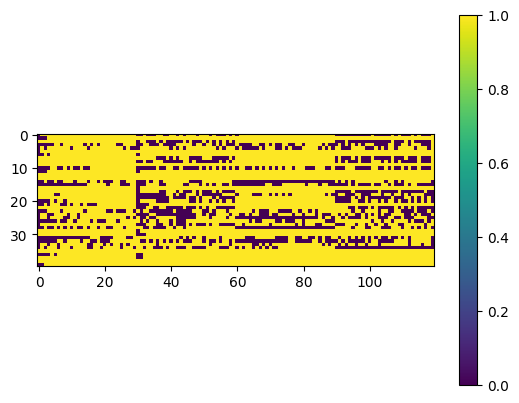

In [8]:
plt.imshow(rwdrate)
plt.colorbar()

(-5.0, 105.0)

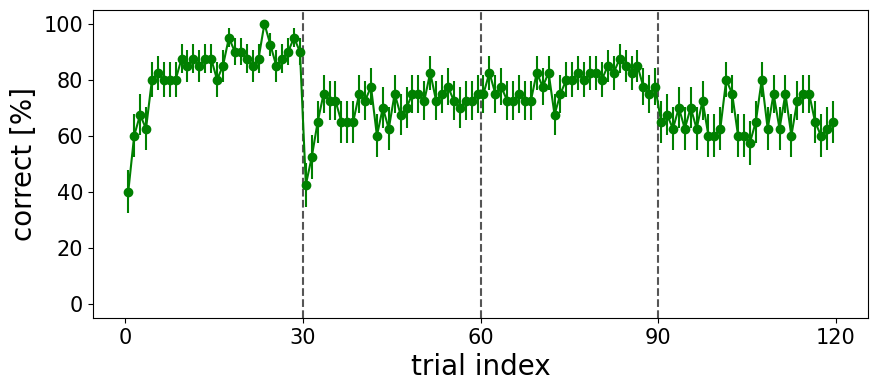

In [9]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [-5,105], "--",color = "#555555")
plt.errorbar(np.arange(trialnum), np.nanmean(rwdrate,0)*100, 100*np.nanstd(rwdrate,0)/np.sqrt(num),fmt="go-")
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("correct [%]", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks(fontsize = 15) 
plt.ylim([-5,105])
#plt.savefig("./figure/switch_prob_2cond_{}_correct_ASD.png".format(hp.prob), bbox_inches = "tight")

In [12]:
inflen = np.zeros((num,trialnum))*np.nan
for x in range(num):
    tmp = [int((len(allresult[x][r][-1]["HCtrans"])-1)/2) for r in range(len(allresult[x]))]
    inflen[x,:len(tmp)] = tmp

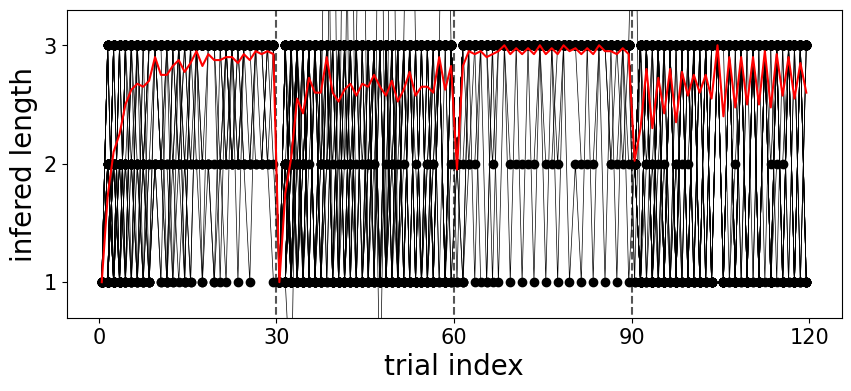

In [13]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [0,5], "--",color = "#555555")
for i in range(num):
    plt.plot(np.arange(trialnum), inflen[i,:]+np.random.rand(trialnum)*0, "ko-", linewidth = 0.5)
plt.plot(np.arange(trialnum), np.nanmean(inflen,0), "r")
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("infered length", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks([1,2,3],fontsize = 15)
plt.ylim([.7,3.3])
plt.savefig("./figure/switch_prob_2cond_{}_inflen_ASD.png".format(hp.prob), bbox_inches = "tight")

In [7]:
oddsum = np.zeros((num,trialnum,4))*np.nan
for n in range(num):
    for t in range(trialnum):
        try:
            oddsum[n,t,:] = oddcounter[n][t]
            oddsum[n,t,3] += oddsum[n,t,1]
        except:
            print("error", n,t)

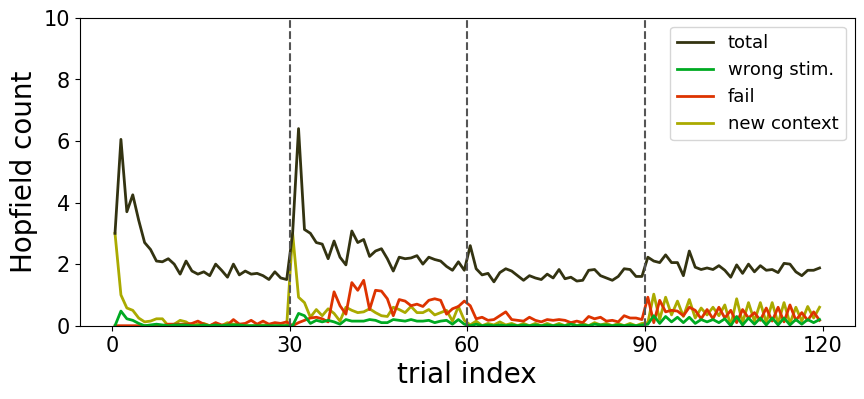

In [10]:
plt.figure(figsize = (10,4))
lbl = ["total","wrong stim.","fail","new context"]
clr = ["#333311","#00aa22","#dd3300","#aaaa00"]
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [0,12], "--",color = "#555555")
for i in range(4):
    h = plt.plot(np.nanmean(oddsum[:,:,i],axis = 0), label = lbl[i], linewidth = 2, color = clr[i],zorder = -i)

plt.legend(fontsize = 13)
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("Hopfield count", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks(np.arange(0,11,2),fontsize = 15) 
plt.ylim([0,10])
plt.savefig("./figure/switch_prob_2cond_{}_odds_ASD.png".format(0.5), bbox_inches = "tight")

In [16]:
choicerate = np.zeros((num,trialnum,2))*np.nan
for x in range(num):
    for r,res in enumerate(allresult[x]):
        rwd,cnd,init = res[-1]["rwd"], res[-1]["cond"], res[0]["cond"]
        if init == 1:
            choice = (cnd == 4)*rwd + (cnd == 5)*(1-rwd)
        else:
            choice = (cnd == 5)*rwd + (cnd == 4)*(1-rwd)
        if choice:
            choicerate[x,r,0] = (cnd == 4)
        else:
            choicerate[x,r,1] = (cnd == 4)

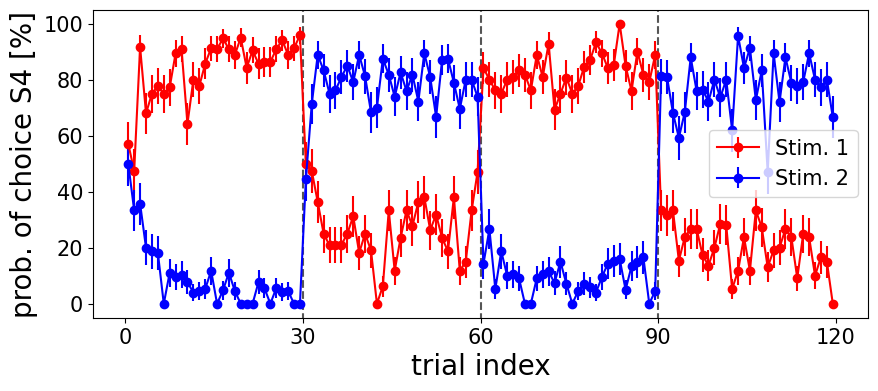

In [17]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [-10,110], "--",color = "#555555")
h1 = plt.errorbar(np.arange(trialnum), np.nanmean(choicerate[:,:,0],0)*100, \
                  100*np.nanstd(choicerate[:,:,0],0)/np.sqrt(num),fmt="ro-", label = "Stim. 1")
h2 = plt.errorbar(np.arange(trialnum), np.nanmean(choicerate[:,:,1],0)*100, \
                  100*np.nanstd(choicerate[:,:,1],0)/np.sqrt(num),fmt="bo-", label = "Stim. 2")
plt.legend(fontsize=15)
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("prob. of choice S4 [%]", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks(fontsize = 15) 
plt.ylim([-5,105])
plt.savefig("./figure/switch_prob_2cond_{}_choice_ASD.png".format(hp.prob), bbox_inches = "tight")